In [ ]:
#all the imports
import json
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read path and filenames from json
with open('private.json', 'r') as fp:
    data = json.load(fp)
    
#
path = data["path"]
clean_csv = data["clean-csv"]

In [ ]:
#read the clean data
flies = pd.read_csv(path + clean_csv, index_col = 0)

In [ ]:
#flies.shape
flies.head()

,conditioning,Aggregation,Chain,Chase,Grooming,Interaction,Song,Stop,Touch,Turn,...,dell2nose,dnose2ell,dnose2tail,dphi,magveldiff_anglesub,magveldiff_nose2ell,nflies_close,velmag,veltoward_anglesub,veltoward_nose2ell
0,Males_Grouped_and_Female,0.164939,0.003074,0.002740,0.623537,0.029996,0.000148,0.928233,0.032032,0.155644,...,17.365786,17.341250,17.931129,0.058062,0.312621,0.218036,0.088728,1.041968,0.019937,0.004199
1,Males_Grouped_and_Female,0.048067,0.007814,0.006962,0.275107,0.050104,0.000296,0.417827,0.046845,0.313694,...,20.178487,20.353836,21.238174,0.563186,0.535738,0.539784,0.123796,10.130153,0.181126,0.004488
2,Males_Grouped_and_Female,0.109465,0.005962,0.002963,0.727448,0.040327,0.000259,0.791920,0.025478,0.211598,...,17.905987,17.964035,18.668223,-0.271579,0.374441,0.296263,0.080951,3.653590,0.058584,-0.008376
3,Males_Grouped_and_Female,0.120019,0.015109,0.019997,0.498037,0.066916,0.000518,0.595134,0.069693,0.253296,...,16.750151,16.666581,17.350089,0.331163,0.421579,0.393482,0.157347,6.955505,0.136966,0.022491
4,Males_Grouped_and_Female,0.045512,0.008073,0.011221,0.277218,0.053140,0.001074,0.435417,0.047882,0.314916,...,18.920606,19.079594,19.947508,-0.069471,0.522098,0.526454,0.118353,10.308028,0.206243,0.003831


In [ ]:
#z-score to all but "conditioning"
behaviors_feature_names = flies.columns.to_list() 
behaviors_feature_names.remove('conditioning')

for i in behaviors_feature_names:
  flies[i] = stats.zscore(flies[i])

In [ ]:
conditionings = flies["conditioning"].unique().tolist()
scores = {"Aggregation", "Chain", "Chase", "Grooming", "Interaction", "Song", "Stop", "Touch", "Turn", "Walk"}
tracking = set(behaviors_feature_names) - scores
scores = list(scores)
tracking = list(tracking)

In [ ]:
flies.drop(tracking, axis = 1, inplace = True)

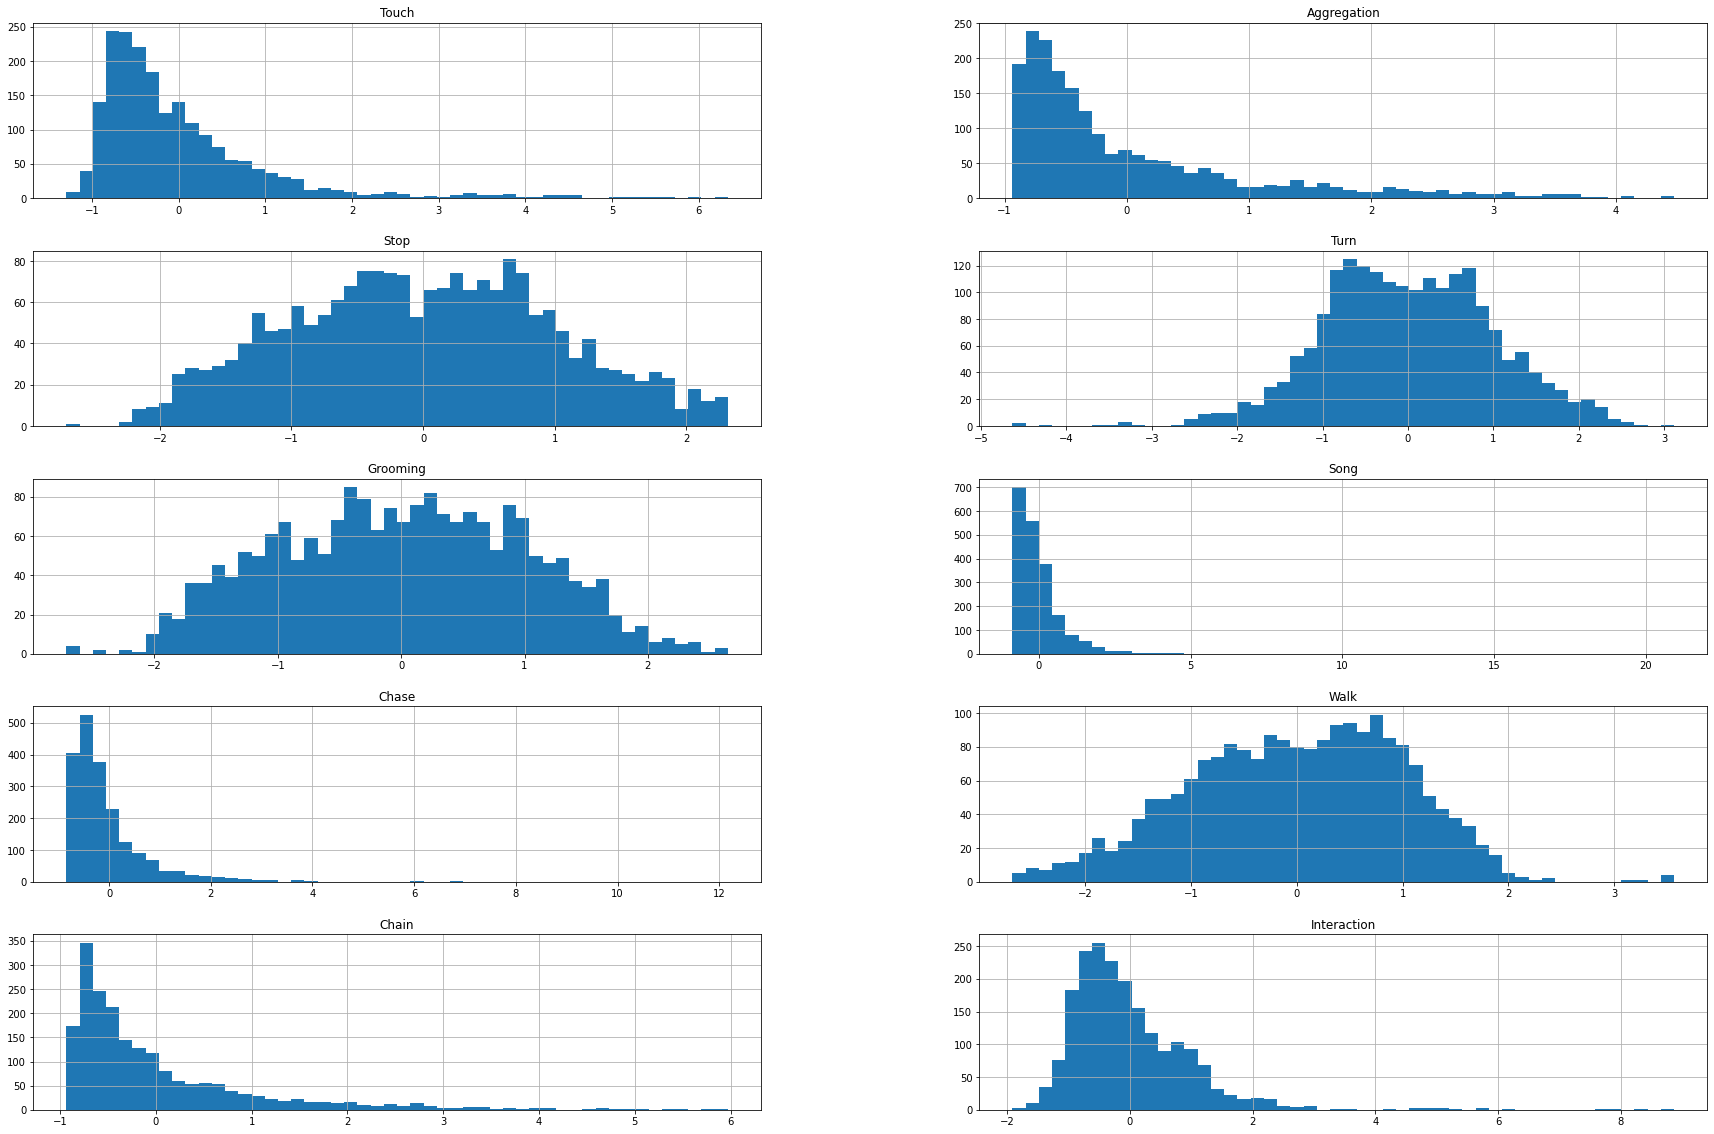

In [ ]:
flies[scores].hist(bins = 50, figsize = (30, 20), layout = (5, 2));

#Walk, Grooming, Stop, Turn appears to be somewhat normal
#Chase, Aggresion, Touch, Song, Chain, Interaction appears to be somewhat poisson

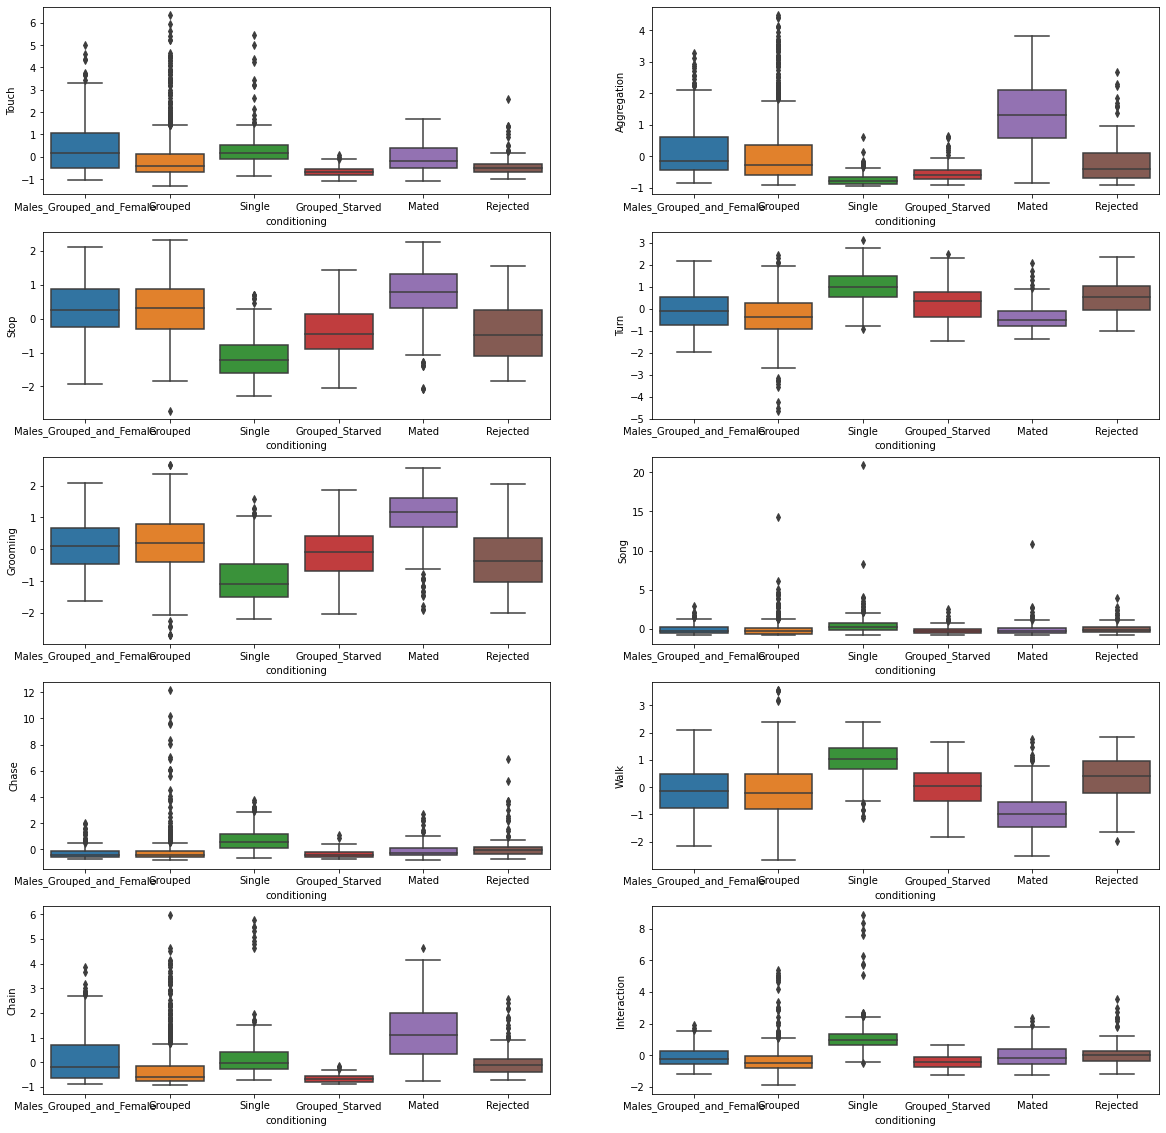

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (20, 20))
for score, subplot in zip(scores, ax.flatten()):
    sns.boxplot(x = 'conditioning', y = score, data = flies, ax = subplot)
    
#Chase distribution is highly unusual and one sided
#Aggresion, Touch, Song, Interaction, Chain are unusual
#Walk, Grooming, Stop, Turn seems normal

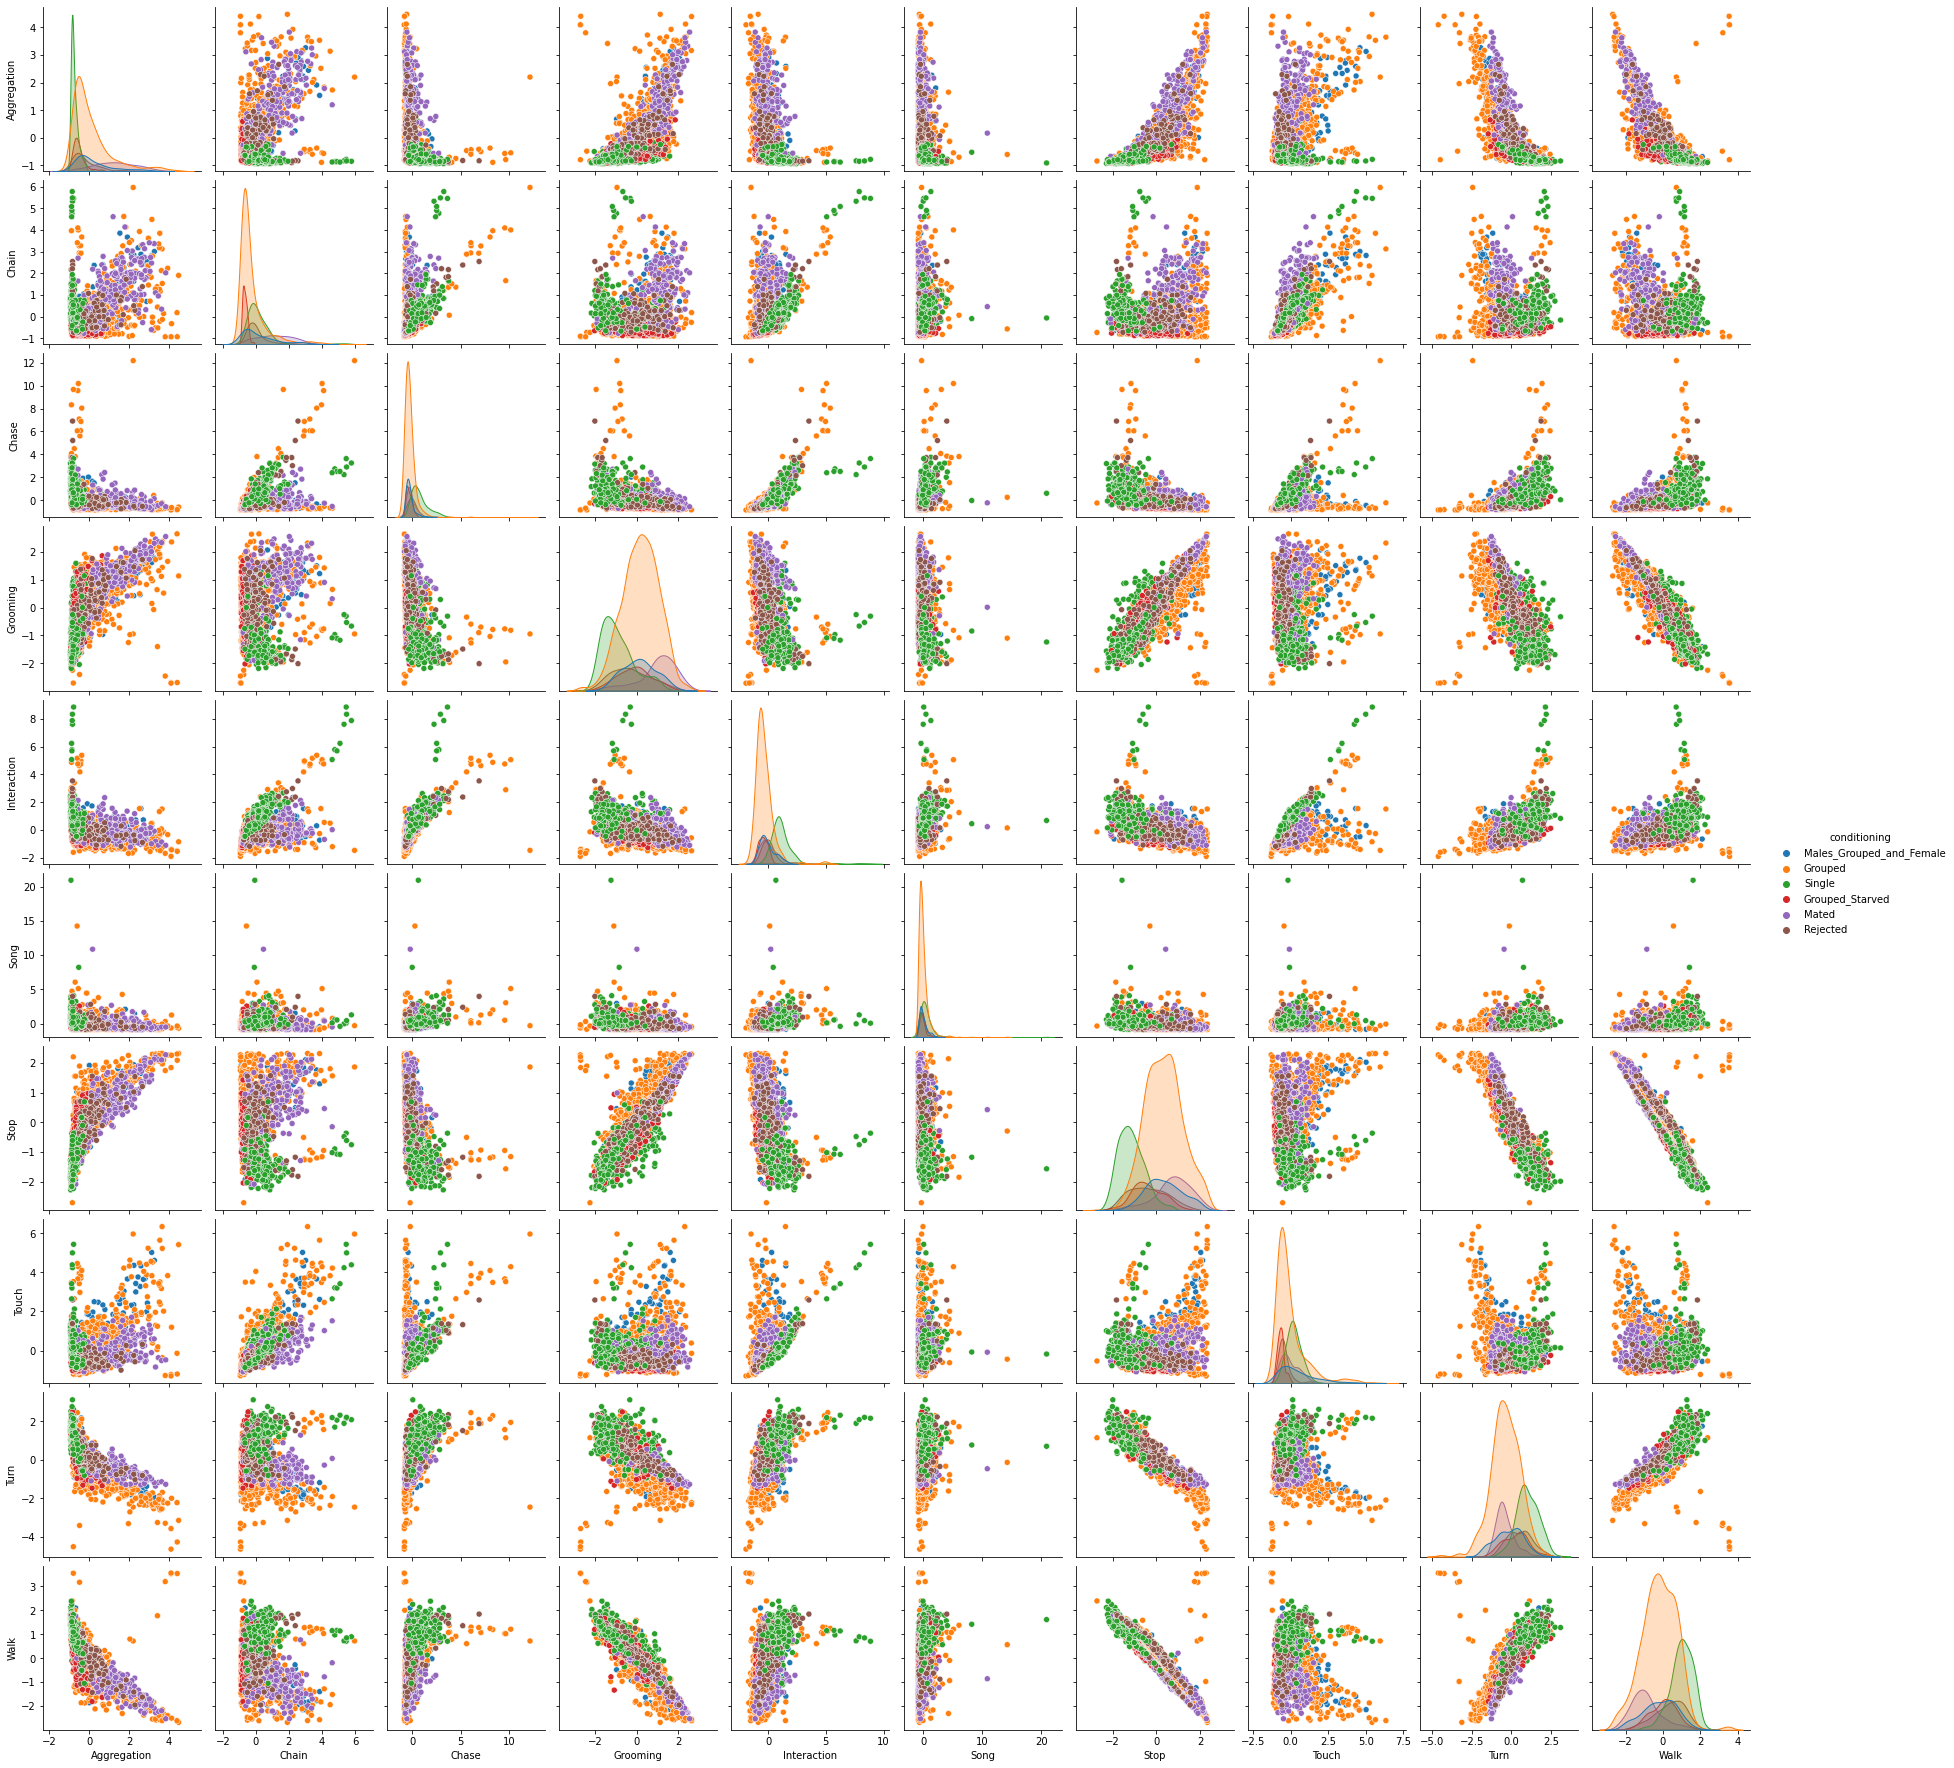

In [ ]:
#pairing plot of all the scoring
sns.pairplot(flies, hue = 'conditioning')

# correlation between Walk, Stop, Grooming & Turn

In [ ]:
#Deceiding on which features and behaviors we want to focus on - the decision was derived from the EDA and the article insights

chosen = {"conditioning", "Grooming", "Chain", "Chase", "velmag", "dcenter", "anglesub", "nflies_close"}
chosen_flies = flies[chosen]

chosen_flies.to_csv(path + chosen_csv)